# Intro Degree and Centrality

## Degree and Closeness centrality

### Node importance

- Higher degree
- Closeness to other nodes
- Fraction of Shortest path that pass through the node


### Network Centrality

- Measures indentify the most important node in the network
  - Influential nodes
  - Nodes that propagate information through/to many nodes
  - Hubs in transportation network
  - Nodes that prevent network from breaking up

Centrality Measures

- Degree Centrality
- Closeness Centrality
- Between Centrality
- Load Centrality
- Page rank
- Katz Centrality
- PercolationCentrality

### Degree Centrality

- Important node has many conections
  - Undirected Network: degree
  - Directed Network: out or in degree

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

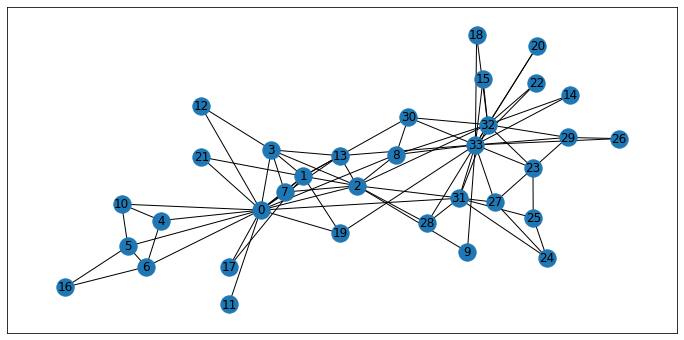

In [4]:
plt.figure(figsize = (12,6))
G = nx.karate_club_graph()
G = nx.convert_node_labels_to_integers(G)
nx.draw_networkx(G)

In [7]:
nx.degree_centrality(G)[10] ### checking degree centrality of node 10

0.09090909090909091

For directed Networks
- `nx.in_degree_centrality(G)` 
- `nx.out_degree_centrality(G)` 

### Closeness Centrality

- Important nodes are close to other nodes

In [10]:
## Let's see the closeness centrality of the node 32

nx.closeness_centrality(G)[32]

0.515625

How did we get this value?

In [13]:
(len(G.nodes())-1) / sum(nx.shortest_path_length(G, 32).values())
## N of nodes -1 divided by sum of shortest path lenght passing through node 32

0.515625

When graph is Directed, closeness centrality is get by another way:
- Consider only nodes that a L-node can reach (out-degree) and normalize by the fraction of nodes L can reach (out-degree / N of nodes)

use:
- `nx.closeness_centrality(G, normalize = True)`

### Betweeness centrality

- The distance between two nodes - is the length of the shortest path between them

(`the N of shortest paths between nodes 's' and 't' that pass through by 'v'`) / (`the N of shortest paths between nodes 's' and 't'`)

- two ways: Including or excluding shortest path passing by node 'v'

In Directed networks

- consider only out paths

In [22]:
## Take the 4 nodes with the higher betweeness centrality in the network

import operator

bet = nx.betweenness_centrality(G, normalized = True, endpoints = False)
sorted(bet.items(),key = operator.itemgetter(1), reverse = True)[0:5]


[(0, 0.43763528138528146),
 (33, 0.30407497594997596),
 (32, 0.145247113997114),
 (2, 0.14365680615680618),
 (31, 0.13827561327561325)]

When the network is too big, it can cost a lot. So we can set a number of nodes to calculate betweeness centrality

In [23]:
bet = nx.betweenness_centrality(G, normalized = True, endpoints = False, k = 10)
sorted(bet.items(),key = operator.itemgetter(1), reverse = True)[0:5]

[(33, 0.3548514911014911),
 (0, 0.3232422438672438),
 (2, 0.16276845839345838),
 (32, 0.1454689754689755),
 (31, 0.11258973665223664)]

And we can calculate de betweeness centrality in a subset of nodes

In [27]:
bet = nx.betweenness_centrality_subset(G, [33,32,20,29,15,26,14,22,9],[0,3,12,10,5,11,16,6],
normalized = True)

sorted(bet.items(),key = operator.itemgetter(1), reverse = True)[0:5]

[(0, 0.04899515993265994),
 (33, 0.028807419432419434),
 (2, 0.018368205868205867),
 (32, 0.01664712602212602),
 (8, 0.014519450456950456)]

We can calculate the betweeness centrality of an edge too, using the N of shortest paths that pass an especific edge

In [28]:
bet = nx.edge_betweenness_centrality(G, normalized = True)

sorted(bet.items(),key = operator.itemgetter(1), reverse = True)[0:5]

[((0, 31), 0.1272599949070537),
 ((0, 6), 0.07813428401663695),
 ((0, 5), 0.07813428401663694),
 ((0, 2), 0.0777876807288572),
 ((0, 8), 0.07423959482783014)]

as soon as by a subset

In [29]:
bet = nx.edge_betweenness_centrality_subset(G, [33,32,20,29,15,26,14,22,9],[0,3,12,10,5,11,16,6],
normalized = True)

sorted(bet.items(),key = operator.itemgetter(1), reverse = True)[0:5]

[((0, 8), 0.01366536513595337),
 ((0, 31), 0.01366536513595337),
 ((13, 33), 0.012207509266332794),
 ((0, 2), 0.01211343123107829),
 ((0, 5), 0.012032085561497326)]

### Summary:

- `Normalization`: Divided by number of nodes to compare between networks
- `Approximation`: Computing betweeness centrality can be computationally expersive, so we can approximate computation by taking a subset of nodes
- `Subsets`: we can define a subset of source and target nodes to compute betweeness centrality
- `Edge Betweeness Centrality`: We can apply the same framework to find important edges instead of nodes

Steps to remove directory

- git rm -r --cached File-or-FolderName
- git commit -m "Removed folder from repository"
- git push origin master

### PageRank

- Can be interpreted as the probability that a random walk lands on the node after k random steps
  - Assign a score of importance to each node based on its in-links. So, importants nodes are those with many in links from important nodes
  - It's mainly used for directed networks
  - A node's PageRank depends on the PR of other nodes

Process:

- n = number of nodes
- k number of steps
  - All nodes has an initial PR of 1/ n
  - Perform basic PR update rule k times
  - The new PR of each node is the sum of all the PR it received from other nodes

Scaled PageRank

- Basic PageRank has a problem. In some networks, a few nodes can 'suck up' all the PageRanks from the Network
- To fix this problem, `Scaled PageRank` introduces an `Alpha` parameter, such that the random walker choose a random node to jump to with probability of 1-`Alpha`
- Typically uses Alpha between 0.8 or 0.9

  - nx.pagerank(G, alpha = 0.8)


In [5]:
G = nx.DiGraph([('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'B'), ('D', 'A'), ('D', 'C'), ('D', 'E'), ('E', 'A')])
nx.pagerank(G, alpha = .8)

{'A': 0.1580170718153684,
 'B': 0.3480044984452954,
 'C': 0.2269892148696681,
 'D': 0.17920215653086635,
 'E': 0.08778705833880177}

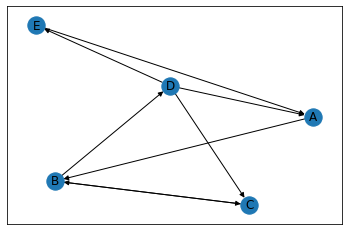

In [6]:
nx.draw_networkx(G)

## Hubs and Authorities

Given a query to a search engine:
- `Root`: set of highly relevant web pages (e.g. page that contain the query string) - are potential `Authorithies`
- Pages that are linked to a page in root is a potential `Hub`
- `Base`: root nodes and any node that link to a root node

### HITS Algorithm

Computing k iterations of the HITS algorithm to assign an authority score and hubs score to each node
1. First, let's assign each node an authority and hub score of 1
2. Then, apply the `Authority update Rule`: each node's `Authority score` is the sum of `Hub scores` of each node that points to that node
3. Then, apply the `Hub update Rule`: each node's `Hub score` is the sum of `Authority scores` of each node that it points to
4. Normalization of both scores = Hub/Authority score (i) / sum(Hub/Authority score of everyone)
5. Repeat this processes k times

In [7]:
G = nx.DiGraph([('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'B'), ('D', 'A'), ('D', 'C'), ('D', 'E'), ('E', 'A')])
nx.hits(G)

C:\Users\Danilo\AppData\Local\Programs\Python\Python310\lib\site-packages\networkx\algorithms\link_analysis\hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


({'A': -5.412464624147085e-17,
  'B': 0.2831185828579486,
  'C': -5.412464624147085e-17,
  'D': 0.5320888862379561,
  'E': 0.1847925309040954},
 {'A': 0.3054072893322786,
  'B': -8.945200010954432e-17,
  'C': 0.3472963553338608,
  'D': 0.12061475842818327,
  'E': 0.22668159690567752})

### Summary

- No pair of centrality measures produces the exact same ranking of nodes, but they have some commonalities
- Centrality measures make different assumptions about what it means to be a 'Central' node. Thus, they produce diferent rankings.
- The best centrality measures depends on the context of the network one is analyzing
- When identify central nodes, it is usualy best to use multiple centrality measures instead of relying on a single one

Degree centrality of G: {'A': 0.3333333333333333, 'B': 0.3333333333333333, 'C': 0.5, 'D': 0.6666666666666666, 'E': 0.5, 'G': 0.5, 'F': 0.16666666666666666}
Closeness centrality of G: 0.6
Betweeness centrality of G normalized: 0.3333333333333333
Betweeness centrality of edge G-F not normalized: 6.0


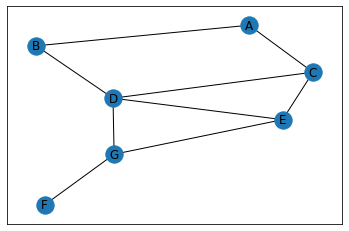

In [37]:
G = nx.Graph([('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('E', 'D'), ('E', 'G'), ('D', 'G'), ('G', 'F')])

nx.draw_networkx(G)
print('Degree centrality of G: {}'.format(nx.degree_centrality(G)))
print('Closeness centrality of G: {}'.format(nx.closeness_centrality(G, 'G')))
print('Betweeness centrality of G normalized: {}'.format(nx.betweenness_centrality(G, normalized = True, endpoints= False)['G']))
print('Betweeness centrality of edge G-F not normalized: {}'.format(nx.edge_betweenness_centrality(G, normalized = False)['G','F']))


PageRank of C with k = 1: ({'A': 0.4142135623730951, 'B': 0.2928932188134525, 'C': 1.9048415650791947e-17, 'D': 0.2928932188134525}, {'A': 4.5986943405861844e-17, 'B': 0.2928932188134525, 'C': 0.7071067811865475, 'D': 0.0})


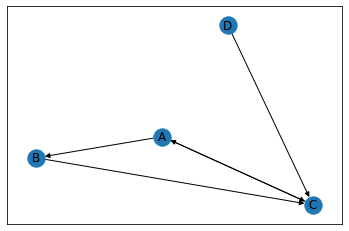

In [35]:
G = nx.DiGraph([('A', 'B'), ('A', 'C'), ('C', 'A'), ('B', 'C'), ('D', 'C')])

nx.draw_networkx(G)

print('PageRank of C with k = 1: {}'.format(nx.hits(G, normalized = True)))

In [44]:
G = nx.DiGraph([('A', 'B'), ('B', 'A') ,('A', 'C'), ('C', 'D'), ('D', 'C')])

l = [.5, .8, .9, .95]
for i in l:
    PR = nx.pagerank(G, alpha = i)
    print(PR)



{'A': 0.21428680419921875, 'B': 0.1785717010498047, 'C': 0.3214282989501953, 'D': 0.28571319580078125}
{'A': 0.13235426576459627, 'B': 0.1029417063058385, 'C': 0.3970582936941615, 'D': 0.36764573423540375}
{'A': 0.07983327489935103, 'B': 0.06092586099927893, 'C': 0.43907413900072123, 'D': 0.4201667251006491}
{'A': 0.04442211856731087, 'B': 0.03360050631947267, 'C': 0.46639949368052747, 'D': 0.4555778814326893}
